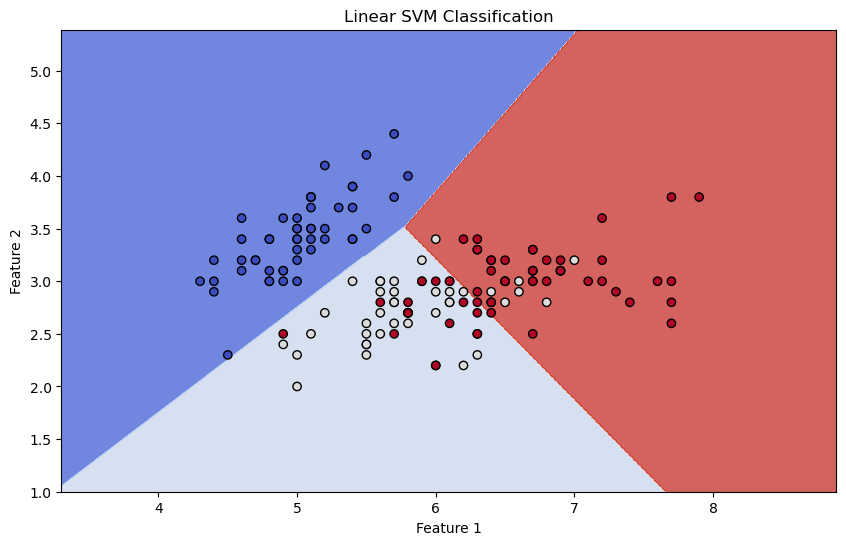

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm

# 加载示例数据集（鸢尾花数据集）
iris = datasets.load_iris()
X, y = iris.data, iris.target

# 仅使用前两个特征，以便可视化
X = X[:, :2]

# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建线性SVM分类器
clf = svm.SVC(kernel='linear')

# 训练模型
clf.fit(X_train, y_train)

# 使用模型进行预测
y_pred = clf.predict(X_test)

# 可视化分类结果
plt.figure(figsize=(10, 6))

# 绘制决策边界
xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.01),
                     np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# 绘制数据点
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linear SVM Classification')
plt.show()

In [2]:
# 分类任务
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# 加载示例数据集（这里使用鸢尾花数据集）
iris = datasets.load_iris()
X, y = iris.data, iris.target

# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建线性SVM分类器
clf = svm.SVC(kernel='linear')

# 训练模型
clf.fit(X_train, y_train)

# 使用模型进行预测
y_pred = clf.predict(X_test)

# 评估模型性能
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
# 回归任务
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import mean_squared_error

# 加载示例数据集（这里使用波士顿房价数据集）
boston = datasets.load_boston()
X, y = boston.data, boston.target

# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建线性SVM回归模型
clf = svm.SVR(kernel='linear')

# 训练模型
clf.fit(X_train, y_train)

# 使用模型进行预测
y_pred = clf.predict(X_test)

# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

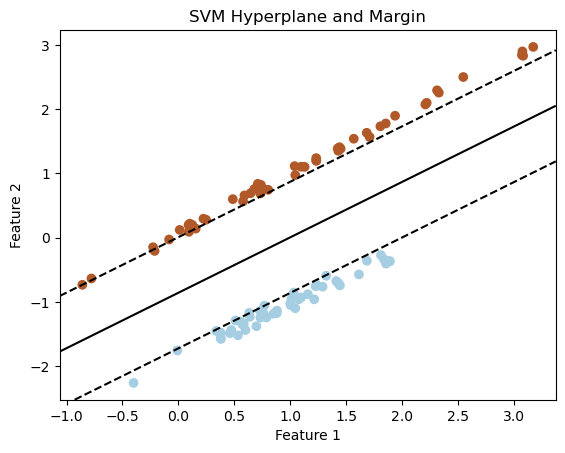

In [4]:
# 绘制超平面以及二分类决策
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm

# 创建示例数据集（这里使用线性可分的数据）
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# 创建线性SVM分类器
clf = svm.SVC(kernel='linear')

# 训练模型
clf.fit(X, y)

# 绘制数据点
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

# 绘制超平面
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 创建网格来评估模型
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 绘制超平面和间隔
ax.contour(xx, yy, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
           levels=[-1, 0, 1])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Hyperplane and Margin')
plt.show()

Best Hyperparameters: {'C': 1, 'gamma': 0.1}
Accuracy: 1.0


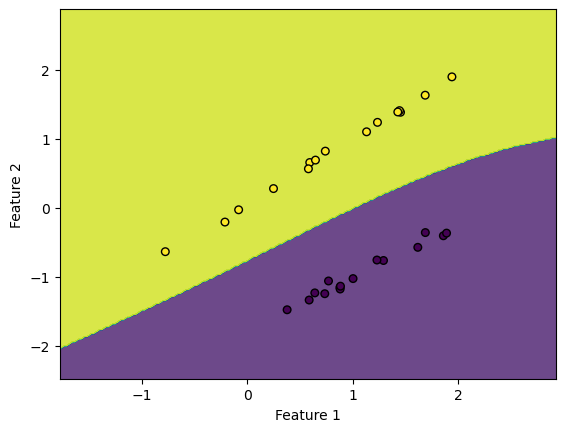

In [5]:
# 二分类问题
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# 生成示例数据
X, y = datasets.make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 定义超参数搜索范围
param_grid = {'C': [0.1, 1, 10],
              'gamma': [0.001, 0.01, 0.1, 1]}

# 创建SVM模型
svm_model = svm.SVC(kernel='rbf')

# 使用网格搜索来选择最佳超参数
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 输出最佳超参数
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# 训练最佳模型
best_svm_model = svm.SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
best_svm_model.fit(X_train, y_train)

# 在测试集上评估模型性能
accuracy = best_svm_model.score(X_test, y_test)
print("Accuracy:", accuracy)

# 绘制决策边界
def plot_decision_boundary(model, X, y):
    h = 0.02  # 步长
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=30)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# 绘制决策边界
plot_decision_boundary(best_svm_model, X_test, y_test)

Accuracy (One-vs-One): 0.9666666666666667
Accuracy (One-vs-Rest): 0.9333333333333333


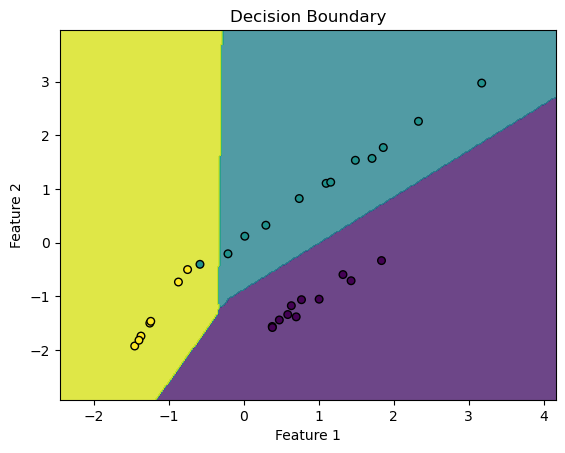

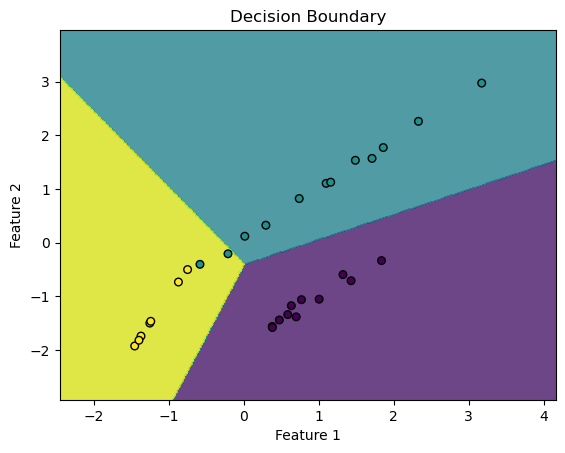

In [6]:
# 多分类问题
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm

# 生成示例数据
X, y = datasets.make_classification(n_samples=100, n_features=2, n_classes=3, n_clusters_per_class=1, n_redundant=0, random_state=42)

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 使用一对一策略
from sklearn.multiclass import OneVsOneClassifier

ovo_svm = OneVsOneClassifier(svm.SVC(kernel='linear'))
ovo_svm.fit(X_train, y_train)
accuracy_ovo = ovo_svm.score(X_test, y_test)
print("Accuracy (One-vs-One):", accuracy_ovo)

# 使用一对多策略
from sklearn.multiclass import OneVsRestClassifier

ova_svm = OneVsRestClassifier(svm.SVC(kernel='linear'))
ova_svm.fit(X_train, y_train)
accuracy_ova = ova_svm.score(X_test, y_test)
print("Accuracy (One-vs-Rest):", accuracy_ova)

# 绘制决策边界
def plot_decision_boundary(model, X, y):
    h = 0.02  # 步长
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=30)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()

# 绘制决策边界（One-vs-One）
plot_decision_boundary(ovo_svm, X_test, y_test)

# 绘制决策边界（One-vs-Rest）
plot_decision_boundary(ova_svm, X_test, y_test)